# Hdip_Giovana Froelich_2024

## 2. Data Preparation

First of all, in order to read and analyze the data set, I need to import some Python libraries.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import plotly.express as px

In [2]:
df=pd.read_csv('healthcare_dataset.csv')

### 2.1 Characterisation of the Dataset

In [3]:
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


Now I'll have a look at the size of the dataset, the type and if there is or not missing values. 

In [4]:
df.shape

(5000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

As we can see above, our data has 5,000 observations and 15 features, but we can also see that there are some missing values or null values. 

I compared the Dtypes with the dictionary and is everything ok, everything match. 

In [6]:
df.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

In [7]:
250*100/5000

5.0

I just checked the missing value in the data frame and I could eliminate the 250 rows of the three features that only have 250 missing values because they only represent 5% of the entire data set. 
But I'll explore a bit more to understand what this is.

In [8]:
df.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,5000.000000,4750.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,7.482200,4.485400
std,17.906991,7.190172,28.671508,58.173633,47.448072,82.623127,13.914919,0.499942,2.281562,2.852405
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,21.049709,105.000000,149.000000,103.000000,78.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.218082,130.000000,201.000000,136.000000,144.000000,80.000000,1.000000,7.000000,4.000000
75%,64.000000,33.530189,155.000000,250.000000,167.000000,213.000000,89.000000,1.000000,9.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


Above we can see that it already has some maximum values ​​that do not correspond to the dictionary we have, I will need to explore this further.

### 2.2. Missing Values

I'll start dealing with my missing values, creating a pattern to make it easier to find the values.

In [9]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("healthcare_dataset.csv", na_values = missing_value_formats)

I'll call the first 60 rows to check whether the NA values are in the same rows or whether they are different between the 3 columns checked previously. 

In [10]:
df.head(60)

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B
5,25,32.065431,NaN,183.0,81,255,168,0,High,11,3,High,Low,Yes,NaN
6,78,21.048292,124.0,NaN,120,244,80,0,Medium,7,1,Low,High,Yes,Disease_C
7,38,32.848816,87.0,120.0,75,32,124,1,Medium,9,0,Low,Low,Yes,Disease_B
8,56,35.563370,159.0,249.0,160,161,69,1,Low,4,7,Low,Low,Yes,Disease_C
9,75,35.098963,97.0,256.0,138,258,82,0,Low,10,5,Low,High,Yes,Disease_C


In [11]:
(250+250+250)*100/5000

15.0

As we can see above, most of them are on different observations, but as some of them represent only 15% of the data set, I'll simply discard them.

In [12]:
df1=df.dropna(subset=['BMI','BloodPressure','Cholesterol'])

In [13]:
df1.shape

(4297, 15)

In [14]:
4297*100/5000

85.94

So this is the shape of the data set after I've eliminated the missing values. 

In [15]:
df1.isnull().sum()

Age                       0
BMI                       0
BloodPressure             0
Cholesterol               0
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1070
dtype: int64

Now, the only missing value we have is in Disease, I'll check what they are.

In [16]:
df1['Disease'].unique()

array(['Disease_B', 'Disease_A', 'Disease_C', nan], dtype=object)

If I take a look in the dictionary, I'll see that this nan is actually "None", so I'll replace it to follow the dictionary pattern. 

In [17]:
df1['Disease'] = df1['Disease'].fillna('None')

/var/folders/j3/cx6mmlb55xq40hncvggj96680000gn/T/ipykernel_2496/4276480518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Disease'] = df1['Disease'].fillna('None')


In [18]:
df1['Disease'].value_counts()

Disease
Disease_B    1081
Disease_C    1078
None         1070
Disease_A    1068
Name: count, dtype: int64

### 2.3. Rename the Columns

In [19]:
df1=df1.rename(columns={"BloodPressure":"Blood Pressure","HeartRate":"Heart Rate","PhysicalActivity":"Physical Activity","SleepTime":"Sleep Time","MedicalHistoryScore":"Medical History Score","IncomeLevel":"Income Level","StressLevel":"Stress Level","HealthIns":"Health Ins"})

In [102]:
df1.head(2)

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Physical Activity,Sleep Time,Medical History Score,Income Level,Stress Level,Health Ins,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A


### 2.4. Outliers

I will check for outliers with the numeric columns in the dataset.

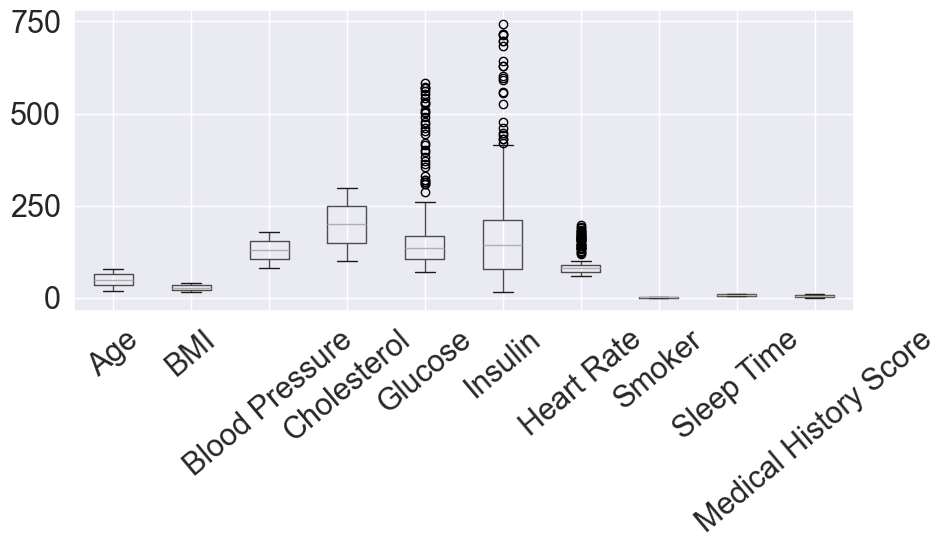

In [103]:
df1.boxplot(figsize=(10, 6))
plt.xticks(rotation=40)  
plt.tight_layout() 
plt.show()

As we can see above, this dataset has outliers in glucose/insulin and heart rate, and I will need to deal with them because if I leave it like that, my machine models will become less accurate.

Also, if we analyze these boxplots and compare them with the information that we have in the data dictionary, we can see that for these 3 columns, we have a different range than what is being given to us in the dictionary, I need to look one by one and analyze what to do with these outliers.

#### Range of the features following the dictionary:
- Glucose: 70 to 200
- Insulin: 15 to 276
- Heart Rate: 60 to 100

As we only have this range in the dictionary, I will find these values ​​within the dataset and exclude them to be able to follow the pattern presented.

In [104]:
# sns.displot(df1["Glucose"])

In [105]:
# more_than_200 = df1[df1['Glucose'] > 200]
# more_than_200.head()

In [106]:
# more_than_200.shape

In [107]:
# sns.displot(df1["Insulin"])

In [108]:
# more_than_276=df1[df1['Insulin'] > 276]
# more_than_276.head()

In [109]:
# more_than_276.shape

In [110]:
# sns.displot(df1["Heart Rate"])

In [111]:
# more_than_100=df1[df1['Heart Rate'] > 100]
# more_than_100.head()

In [112]:
# more_than_100.shape

In [113]:
# 41+30+41

In [114]:
# 112*100/5000

Therefore, the total values ​​of the three features are 112, which represents 2% of the data set, I will eliminate them to follow the dictionary pattern.
And in total, I lost around 17% of the dataset, which is ok.

In [115]:
df2=df1

In [116]:
over_200 = 200
df2 = df1.drop(df1[df1['Glucose'] > over_200].index)

In [117]:
df2.shape

(4256, 15)

In [118]:
over_276 = 276
df2 = df2.drop(df2[df2['Insulin'] > over_276].index)

In [119]:
df2.shape

(4226, 15)

In [120]:
over_100 = 100
df2 = df2.drop(df2[df2['Heart Rate'] > over_100].index)

In [121]:
df2.shape

(4185, 15)

Checking below again to make sure the outliers have been excluded. 

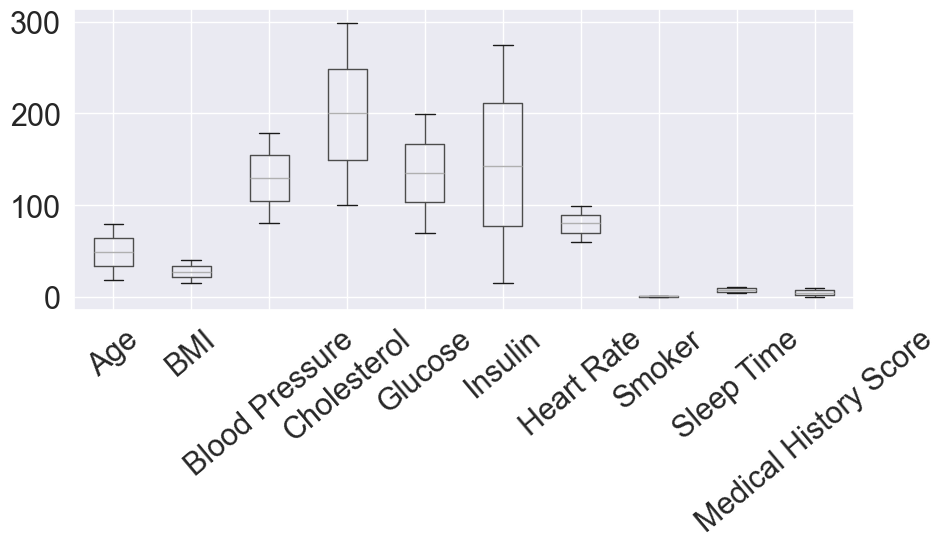

In [122]:
df2.boxplot(figsize=(10, 6))
plt.xticks(rotation=40)  
plt.tight_layout() 
plt.show()

Below, I checked whether the numerical columns were related to each other or not. As the result was negative, I will ask some questions in the course of the exploration to try to gain some insight and understand the data set.

In [123]:
df3=df1.select_dtypes(exclude=object)
df3.corr()

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Sleep Time,Medical History Score
Age,1.000000,0.011350,0.006521,0.015077,-0.003770,-0.016916,-0.000185,-0.027252,-0.000251,0.030974
BMI,0.011350,1.000000,0.005949,-0.007469,0.015038,-0.023029,0.008414,-0.014321,-0.005060,0.011061
Blood Pressure,0.006521,0.005949,1.000000,0.008839,0.010100,0.023059,0.006593,-0.020523,-0.007224,0.002549
Cholesterol,0.015077,-0.007469,0.008839,1.000000,0.028962,-0.003387,-0.003409,-0.017041,0.023849,0.008629
Glucose,-0.003770,0.015038,0.010100,0.028962,1.000000,-0.033025,-0.012564,0.028207,0.007560,-0.010613
Insulin,-0.016916,-0.023029,0.023059,-0.003387,-0.033025,1.000000,-0.031384,0.023349,0.000619,0.005769
Heart Rate,-0.000185,0.008414,0.006593,-0.003409,-0.012564,-0.031384,1.000000,-0.034672,0.011652,-0.015507
Smoker,-0.027252,-0.014321,-0.020523,-0.017041,0.028207,0.023349,-0.034672,1.000000,-0.006543,-0.008722
Sleep Time,-0.000251,-0.005060,-0.007224,0.023849,0.007560,0.000619,0.011652,-0.006543,1.000000,-0.005604
Medical History Score,0.030974,0.011061,0.002549,0.008629,-0.010613,0.005769,-0.015507,-0.008722,-0.005604,1.000000


### 2.5. EDA (Exploratory data Analytics)

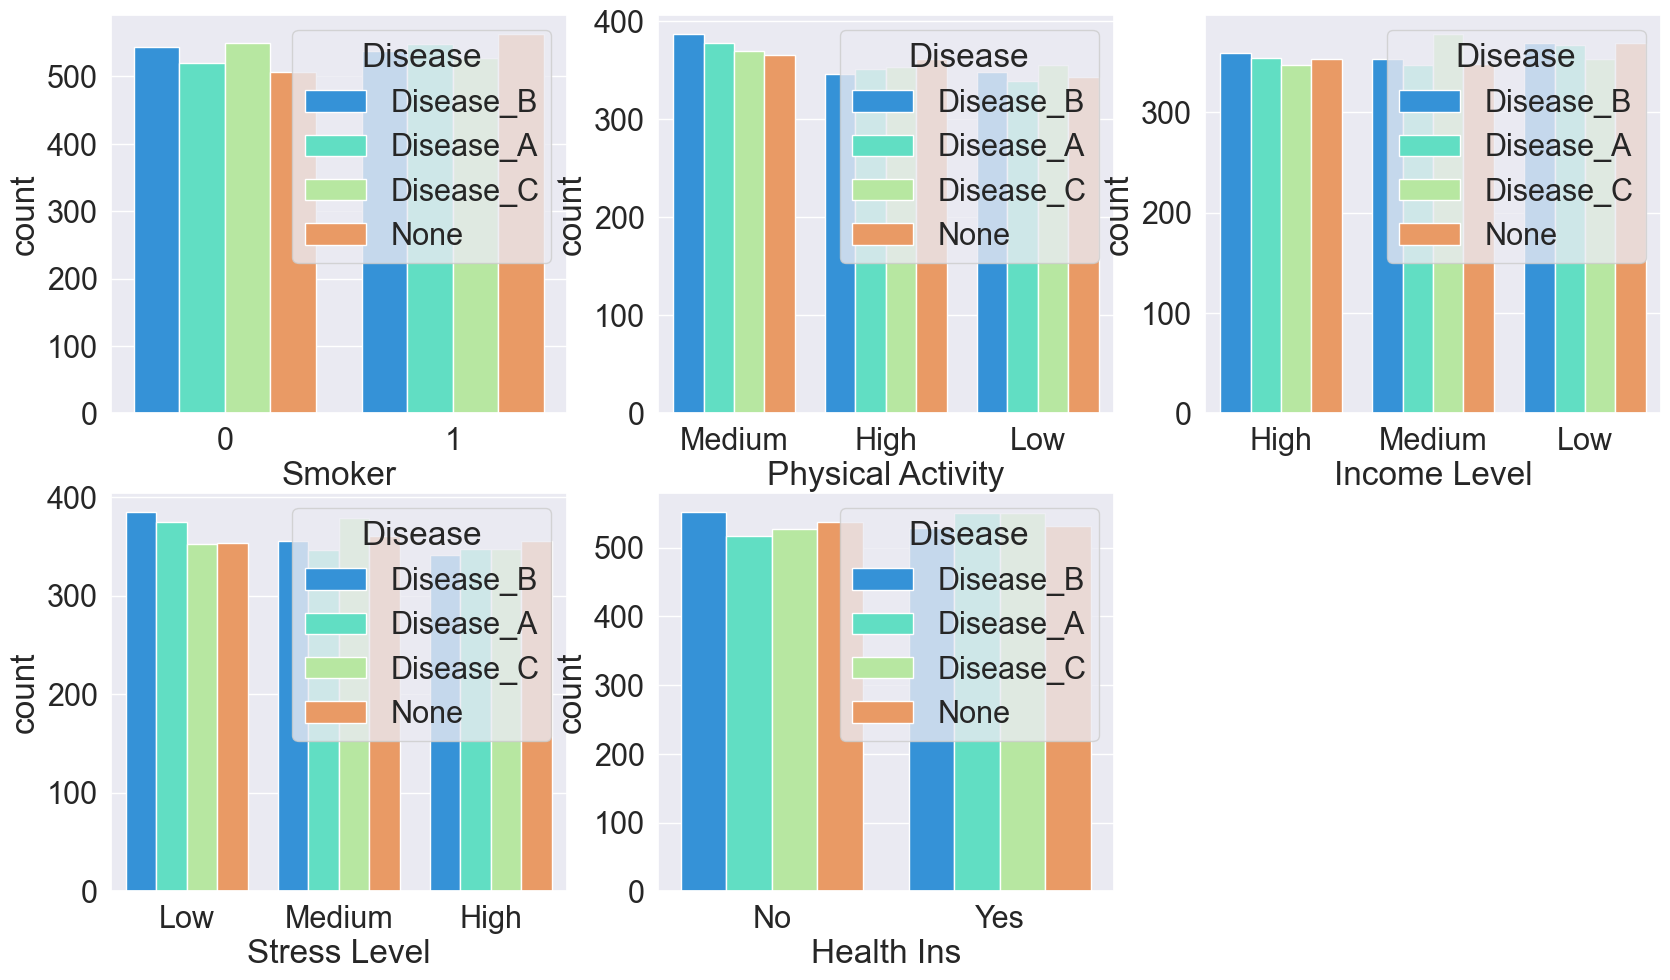

In [124]:
plt.figure(figsize=(20, 30))
i = 1
for feature in ["Smoker", "Physical Activity", "Income Level", "Stress Level", "Health Ins"]:
    plt.subplot(5, 3, i)
    sns.countplot(x=feature, hue='Disease', data=df1, palette='rainbow')
    i += 1

plt.show()

Above we can see that people who have disease A don't smoke, have an average level of physical activity and a low level of stress.

Disease B: most people smoke and have an average level of physical activity, as well as a low level of stress.

Disease C: most people don't smoke and do sport frequently, but have a medium level of stress. 

- Do the people who go to the doctor the most have paid health insurance?

In [125]:
c1 =pd.crosstab(df1["Health Ins"], df1["Medical History Score"])
c1['Total'] = c1.sum(axis=1)
c1.loc['Total Columns'] = c1.sum()
c1.style.background_gradient(cmap='Blues')

Medical History Score,0,1,2,3,4,5,6,7,8,9,Total
Health Ins,,,,,,,,,,,
No,206,213,221,219,234,213,207,224,190,207,2134
Yes,240,206,186,237,198,211,236,220,229,200,2163
Total Columns,446,419,407,456,432,424,443,444,419,407,4297


I'm going to follow the thinking of people with a score above 6, who go to the doctor the most, so we can see above,

Of these, 48.34% do not have health insurance.
Conversely, 51.66% of them have health insuranc.


- What is the income of people who pay for health insurance?

In [43]:
c2 = pd.crosstab(df1["Health Ins"], df1["Income Level"])
c2['Total'] = c2.sum(axis=1)
c2.loc['Total Rows'] = c2.sum()
c2_rows = c2.div(c2['Total'], axis=0).round(2)
c2_cols = c2.div(c2.loc['Total Rows'], axis=1).round(2)
print("Proportions in relation to the total of each line:")
print(c2_rows)
print("\nProportions in relation to the total of each column:")
print(c2_cols)

Proportions in relation to the total of each line:
Income Level  High   Low  Medium  Total
Health Ins                             
No            0.33  0.32    0.35    1.0
Yes           0.33  0.36    0.31    1.0
Total Rows    0.33  0.34    0.33    1.0

Proportions in relation to the total of each column:
Income Level  High   Low  Medium  Total
Health Ins                             
No            0.49  0.47    0.52    0.5
Yes           0.51  0.53    0.48    0.5
Total Rows    1.00  1.00    1.00    1.0


The results show that although there is a slight tendency for people with lower incomes to have less health insurance, this may mean that people with a higher level of income resort to private insurance doctors.

- Does the level of stress change according to monthly income?

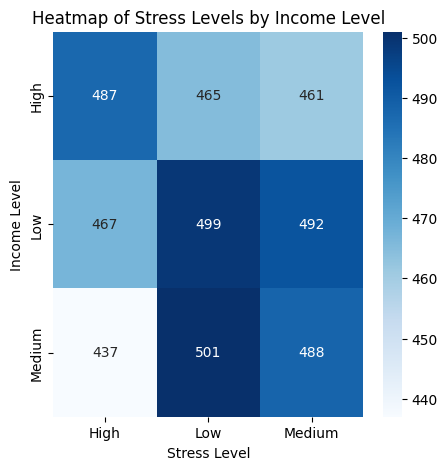

In [54]:
c3 = pd.crosstab(df1["Income Level"], df1["Stress Level"])
c3['Total'] = c3.sum(axis=1)
c3.loc['Total Columns'] = c3.sum()
plt.figure(figsize=(5, 5))
sns.heatmap(c3.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='d')

plt.title('Heatmap of Stress Levels by Income Level')
plt.xlabel('Stress Level')
plt.ylabel('Income Level')
plt.show()

We can see that it's very balanced, the stress level doesn't actually change much between income levels. 

- Does the level of stress vary depending on whether the person is a smoker or not?

In [46]:
c4 = pd.crosstab(df2["Smoker"], df2["Stress Level"])
c4['Total'] = c4.sum(axis=1)
c4.loc['Total Columns'] = c4.sum()
c4.style.background_gradient(cmap='Blues')

Stress Level,High,Low,Medium,Total
Smoker,,,,
0,660,692,713,2065
1,699,737,684,2120
Total Columns,1359,1429,1397,4185


We can see a small increase in the numbers in relationships of people smoking more and having a low level of stress, this suggests a scenario in which, despite practicing the behavior of smoking, these individuals do not have high levels of stress

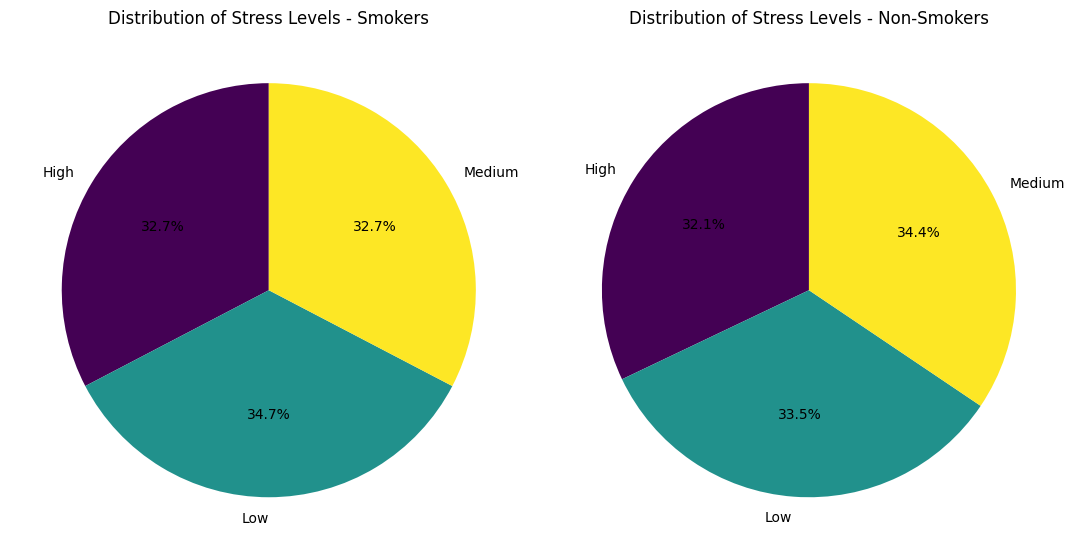

In [72]:
c4 = pd.crosstab(df1["Smoker"], df1["Stress Level"])
fig, axes = plt.subplots(1, 2, figsize=(11, 6))
c4_fumantes = c4.loc[1]
c4_fumantes.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, cmap='viridis', legend=None)
axes[0].set_ylabel('')
axes[0].set_title('Distribution of Stress Levels - Smokers')
c4_nao_fumantes = c4.loc[0]
c4_nao_fumantes.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, cmap='viridis', legend=None)
axes[1].set_ylabel('')
axes[1].set_title('Distribution of Stress Levels - Non-Smokers')
plt.tight_layout()
plt.show()


We can see a small increase in the number of relationships between people who smoke more and have a low level of stress, which suggests a scenario in which, despite practising the behaviour of smoking, these individuals do not have high levels of stress, but again, the data set is very balanced.

- What is the age with the highest number of smokers?

In [73]:
df1['Smoker'].value_counts()

Smoker
1    2177
0    2120
Name: count, dtype: int64

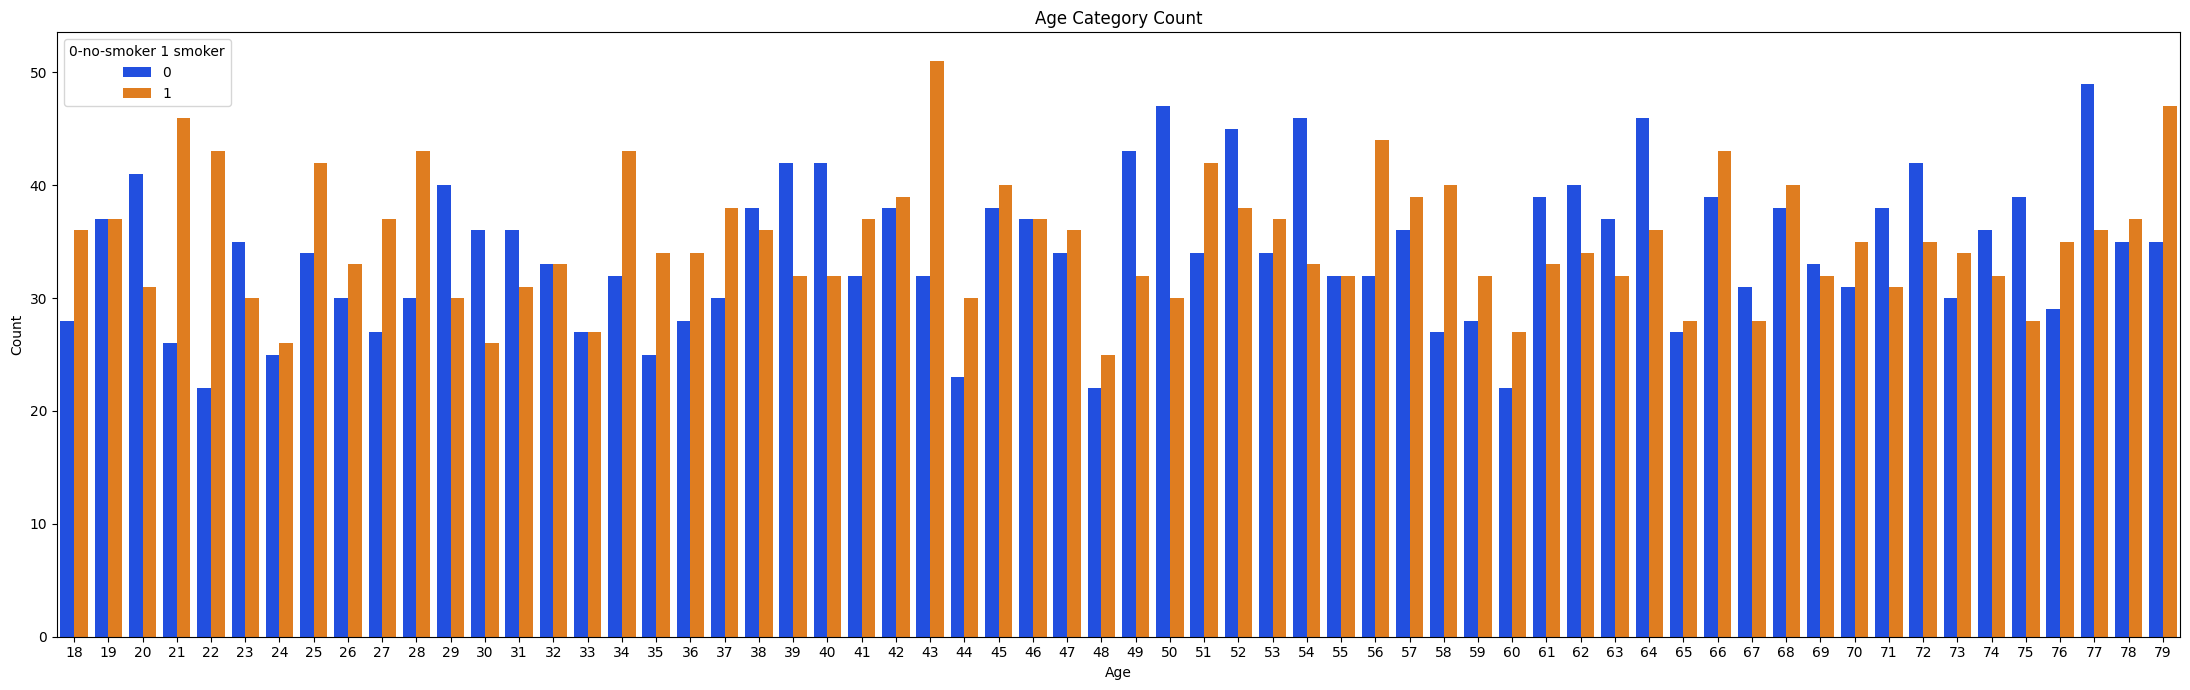

In [90]:
plt.figure(figsize=(22, 7))
sns.countplot(data=df1, x='Age', hue='Smoker', palette='bright')
plt.title('Age Category Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='0-no-smoker 1 smoker')
plt.tight_layout()
plt.show()

So we can see that, in this dataset, there are more smokers than non-smokers, there are approximately 50.67% smokers, but the dataset is well balanced when we look at the ages, but we can see a small increase in the number of smokers at ages 21,43 and 77, but that can happen because in this dataset there are more people with this ages. 

In [91]:
# plt.figure(figsize=(18, 6))
# plt.hist(df1['Age'], bins=range(df1['Age'].min(), df1['Age'].max() + 2), edgecolor='black', align='left')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title('Age distribution')
# plt.xticks(range(df1['Age'].min(), df1['Age'].max() + 1))
# plt.show()

### Does the level of stress vary according to the number of hours slept per day? 

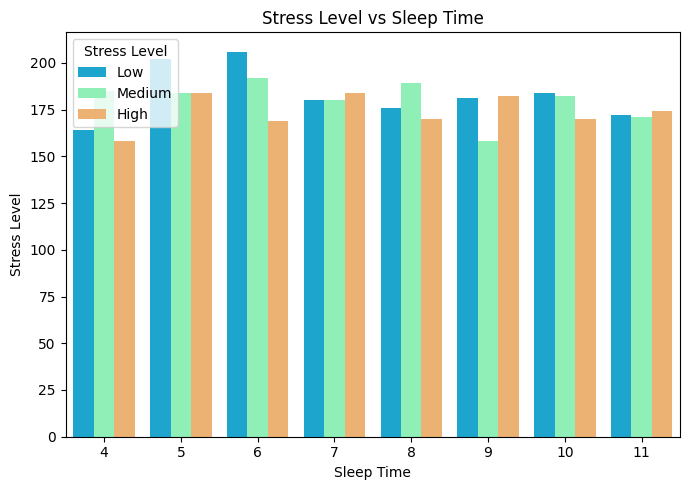

In [96]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df1, x='Sleep Time', hue='Stress Level', palette='rainbow')
plt.title('Stress Level vs Sleep Time')
plt.xlabel('Sleep Time')
plt.ylabel('Stress Level')
plt.legend(title='Stress Level')
plt.tight_layout()
plt.show()

We can see that there isn't much difference in the level of stress compared to the number of hours slept per night. 

Below, I make a scatter plot to see if there is any relationship between Blood Pressure, age and Heart Rate, but again, the data set is very balanced and I can't get any insight.

<Axes: xlabel='Age', ylabel='Blood Pressure'>

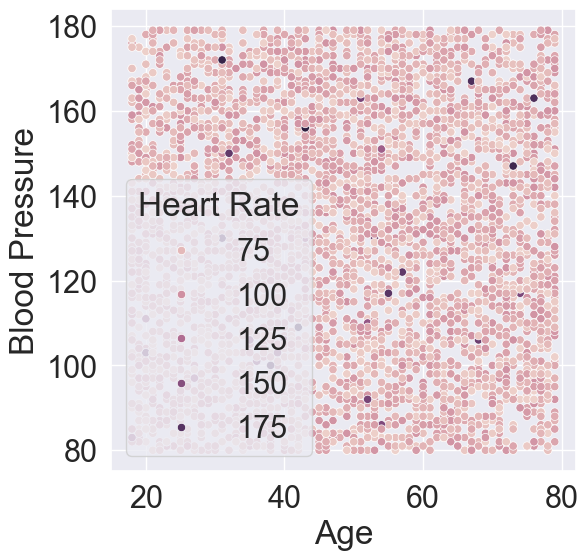

In [139]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Age",y="Blood Pressure",hue ="Heart Rate",data = df1)

In [53]:
df2 = df2.reset_index(drop=True)

In [140]:
# teste
df1 = df1.reset_index(drop=True)

# Encoding

I need to encode the categorical variables of the dataset because most machine learning algorithms work well only with numerical data, so in order to preserve while allowing algorithms to process them effectively.

In [141]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

I'll create a list of the columns that I want to encode. 

In [142]:
columns_to_encode = ['Physical Activity', 'Income Level', 'Sleep Time', 'Stress Level','Medical History Score','Health Ins', 'Disease']

In [143]:
enc = LabelEncoder()

In [144]:
# df2_encoded = df2.apply(lambda col: enc.fit_transform(col) if col.name in columns_to_encode else col)

In [145]:
# teste
df1_encoded = df1.apply(lambda col: enc.fit_transform(col) if col.name in columns_to_encode else col)

then assign it to the original dataframe

In [148]:
# df3 = df2_encoded

In [146]:
#teste
df3 = df1_encoded

In order to know if it works, I'll call the first rowls with the head function

In [147]:
df3.head(1)

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Physical Activity,Sleep Time,Medical History Score,Income Level,Stress Level,Health Ins,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,2,5,5,0,1,0,1


Now that I have all the numerical columns, I'll check the correlation between the features and my target, which is the disease again. 

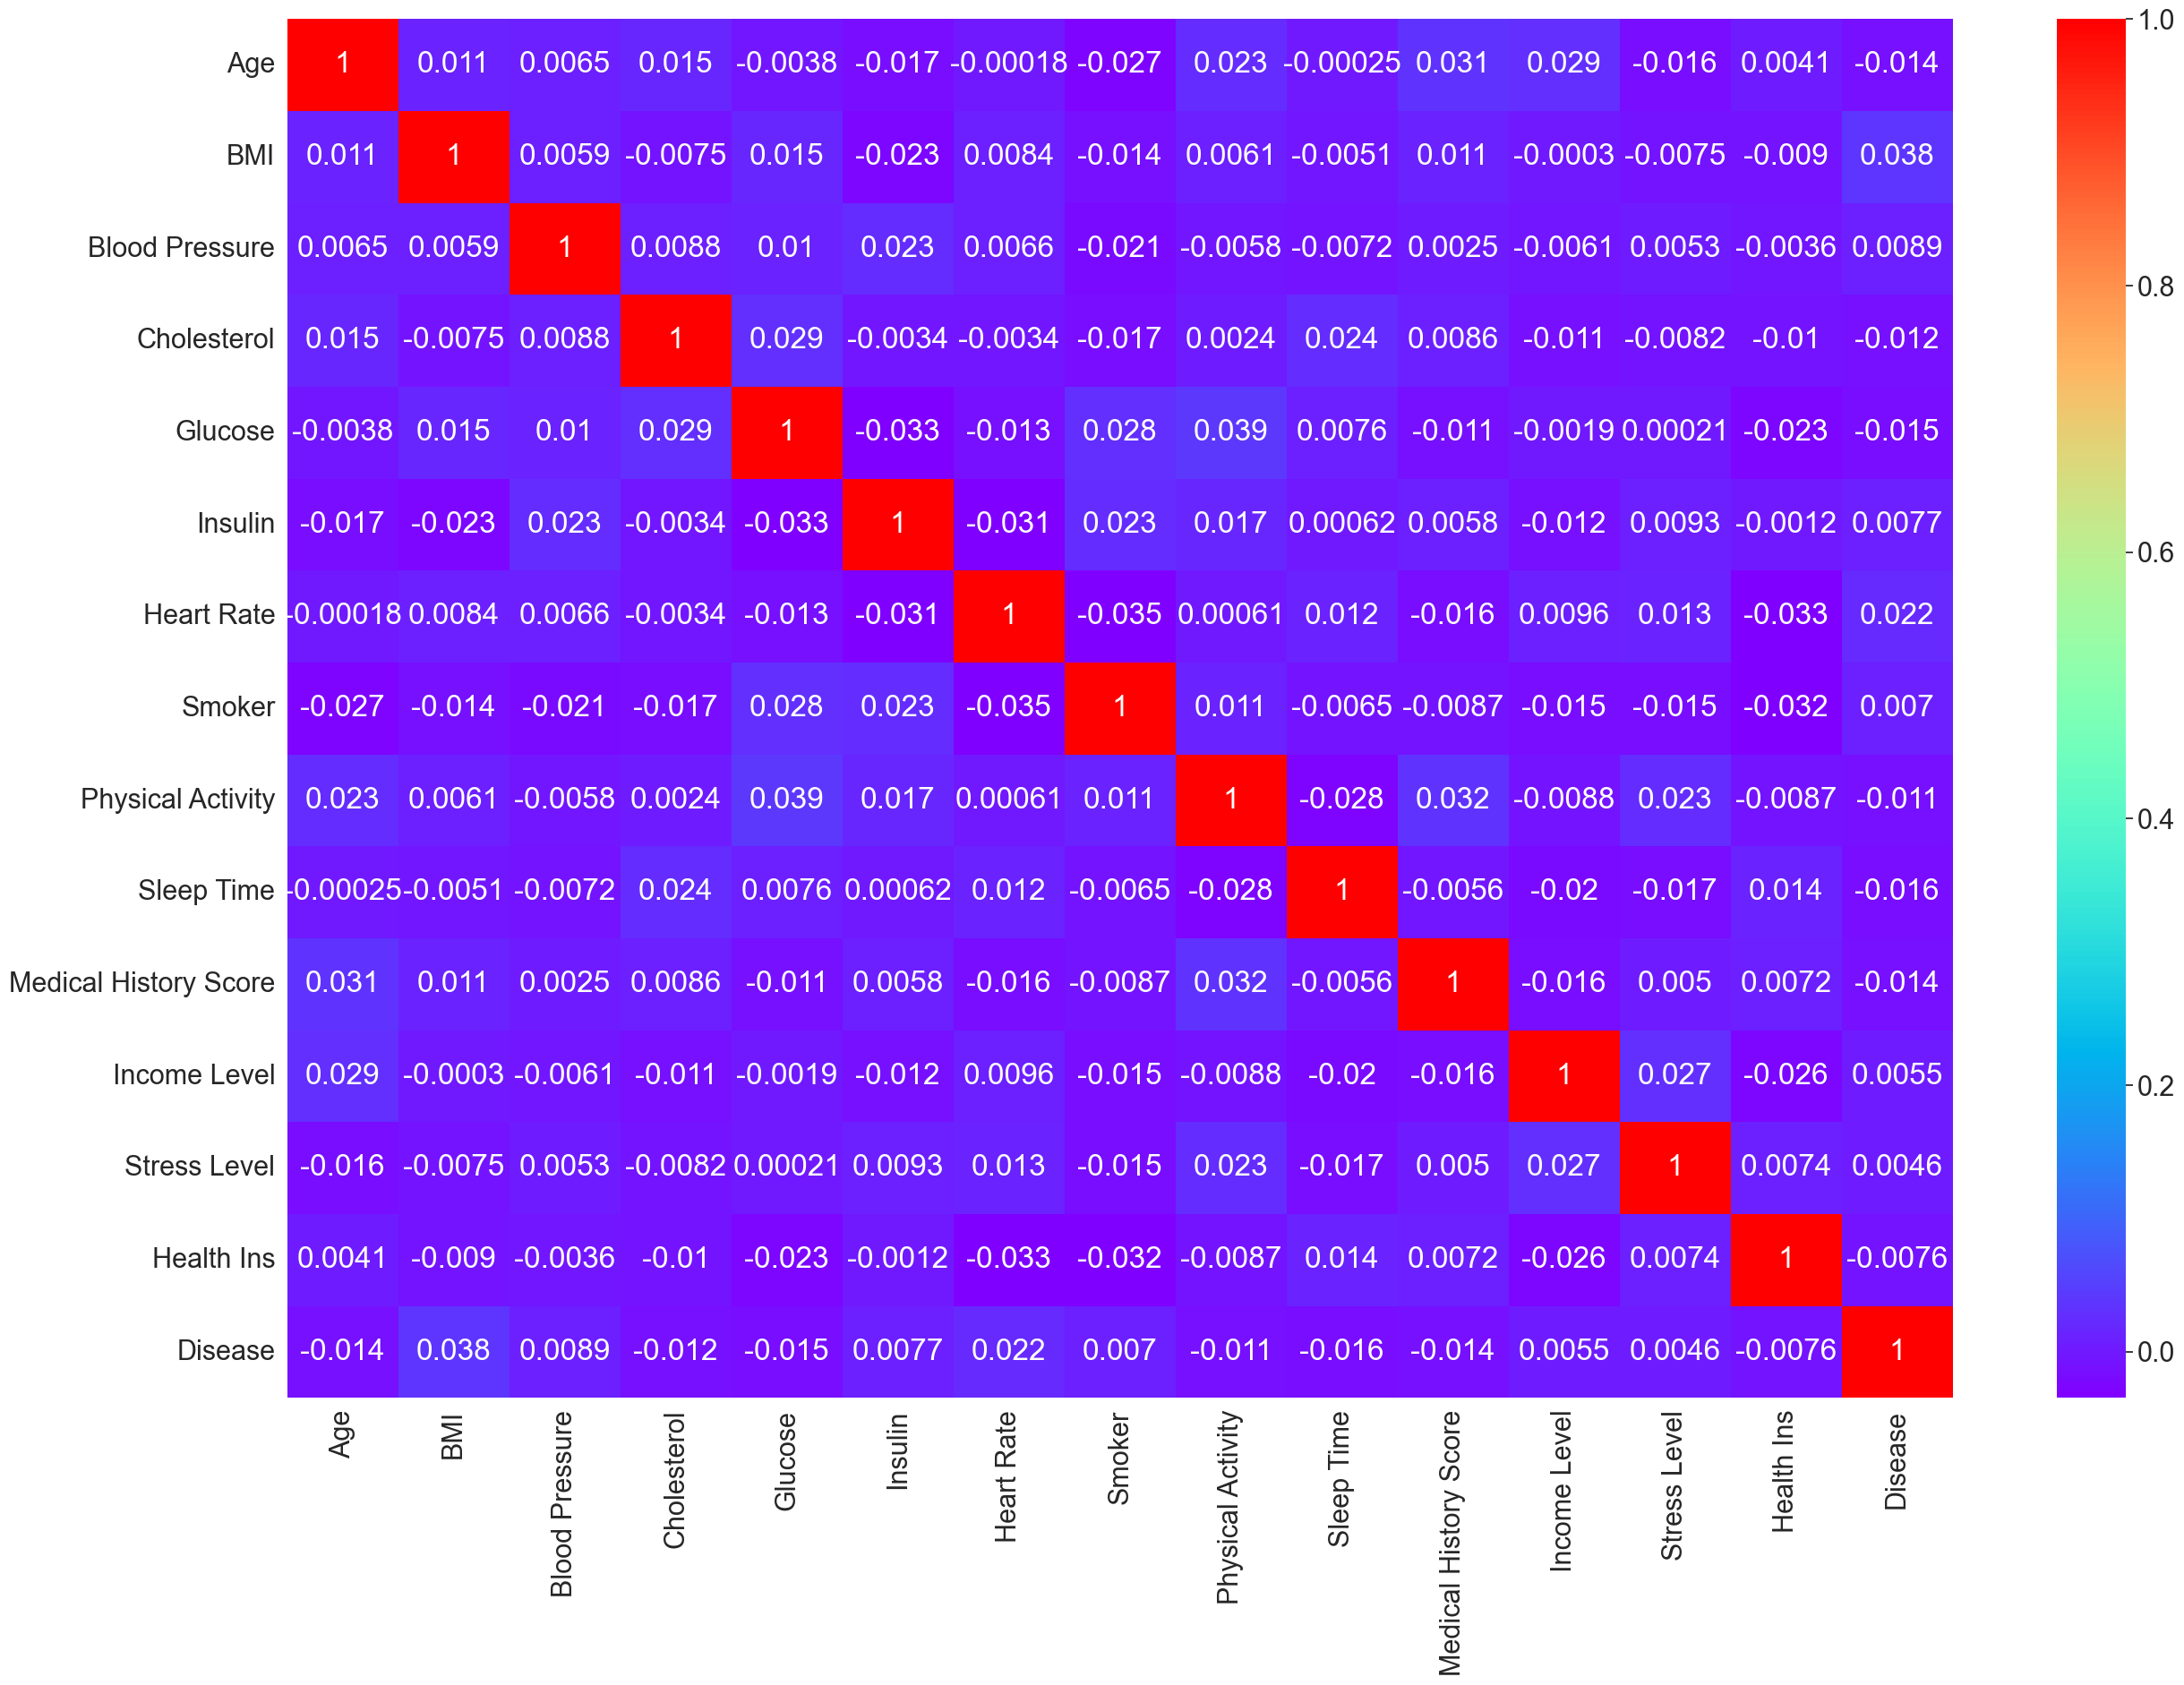

In [30]:
plt.figure(figsize=(30,20))
c = df3.corr()
sns.heatmap(c, cmap="rainbow", annot=True)
plt.show()

Above, we can see that there isn't a great correlation between the features, so this is something I'll need to check and understand after applying some machine learning algorithms.

### Scaling

Scaling numerical features is essential to ensure that features with different scales contribute equally to the model training process. 

I'll create a list with the columns that I want to scaling.

In [53]:
from sklearn.preprocessing import MinMaxScaler


columns = ['Age','BMI', 'Blood Pressure','Cholesterol','Heart Rate','Insulin','Glucose']


scaler = MinMaxScaler()


df3[columns] = scaler.fit_transform(df3[columns])

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4297 non-null   float64
 1   BMI                    4297 non-null   float64
 2   Blood Pressure         4297 non-null   float64
 3   Cholesterol            4297 non-null   float64
 4   Glucose                4297 non-null   float64
 5   Insulin                4297 non-null   float64
 6   Heart Rate             4297 non-null   float64
 7   Smoker                 4297 non-null   int64  
 8   Physical Activity      4297 non-null   int64  
 9   Sleep Time             4297 non-null   int64  
 10  Medical History Score  4297 non-null   int64  
 11  Income Level           4297 non-null   int64  
 12  Stress Level           4297 non-null   int64  
 13  Health Ins             4297 non-null   int64  
 14  Disease                4297 non-null   int64  
dtypes: f

In [55]:
df3.head()

,Age,BMI,Blood Pressure,Cholesterol,Glucose,Insulin,Heart Rate,Smoker,Physical Activity,Sleep Time,Medical History Score,Income Level,Stress Level,Health Ins,Disease
0,0.622951,0.503301,0.080808,0.040201,0.042969,0.213992,0.108696,0,2,5,5,0,1,0,1
1,0.836066,0.449542,0.080808,0.763819,0.062500,0.224966,0.079710,0,0,5,3,0,2,1,0
2,0.459016,0.586119,0.727273,0.206030,0.037109,0.251029,0.217391,1,1,1,5,2,2,0,2
3,0.229508,0.625056,0.262626,0.869347,0.173828,0.283951,0.028986,1,2,3,0,2,0,0,2
4,0.688525,0.071797,0.161616,0.361809,0.201172,0.020576,0.282609,1,1,3,3,0,2,0,1


In [34]:
from sklearn.decomposition import PCA 

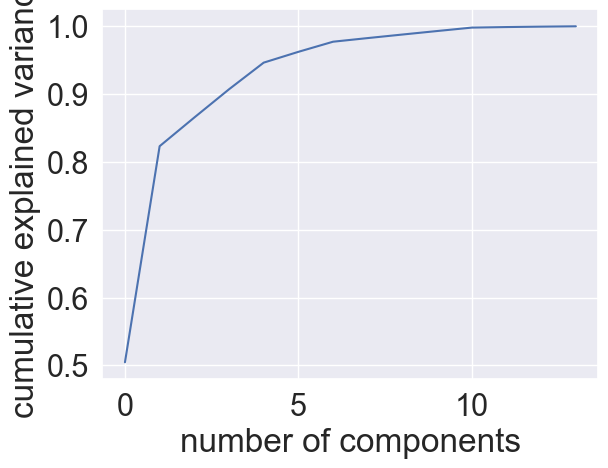

In [56]:
df_no_label = df3.drop("Disease", axis=1) 
#df_no_label = df3.drop(columns = ["Disease", "Smoker", "Physical Activity", "Sleep Time", "Medical History Score", "Income Level", "Stress Level", "Health Ins"])
pca = PCA().fit(df_no_label)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance') 
plt.show() 

In [57]:
pca = PCA(5)
projected = pca.fit_transform(df_no_label)

In [58]:
projected.shape

(4297, 5)

In [59]:
df_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4','C5'])

In [60]:
df_pca.head(1)

,C1,C2,C3,C4,C5
0,0.520885,1.530165,-0.542902,-1.249776,0.231825


In [61]:
df_pca["Disease"] = df3["Disease"]

In [62]:
df_pca.head()

,C1,C2,C3,C4,C5,Disease
0,0.520885,1.530165,-0.542902,-1.249776,0.231825,1
1,-1.494990,1.526812,0.414273,0.149749,1.675778,0
2,0.549825,-2.482592,-0.758453,1.143672,0.103759,2
3,-4.467102,-0.539540,-0.427225,-0.191743,-1.679089,2
4,-1.464676,-0.489787,-0.335933,-0.386172,1.302202,1


In [63]:
df_array = df_pca.values

In [64]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:5]
y = df_array[:,5]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [65]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [66]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [67]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.234785 (0.022366)
LDA: 0.235657 (0.023137)
KNN: 0.239455 (0.013368)
CART: 0.252551 (0.026581)
NB: 0.239161 (0.017673)
SVM: 0.229273 (0.010143)


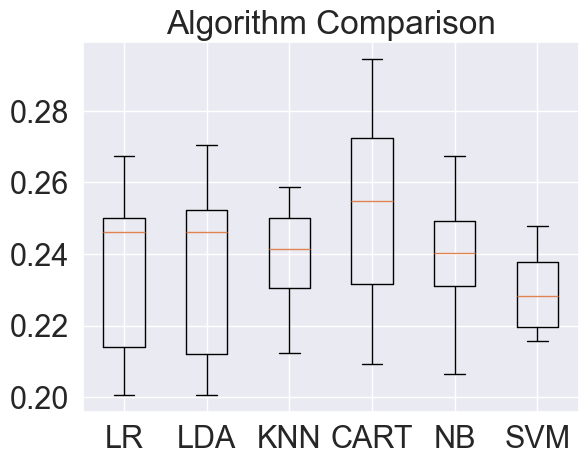

In [68]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [69]:
pca.explained_variance_ratio_.sum()

0.9464075169423692

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [71]:
label = df3[['Disease']]

In [72]:
df_x=df3.drop(['Disease'], axis = 1)

In [73]:
X=df_x
y=label

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
X_lda= lda.fit_transform(X,y)

/Users/macbookair/anaconda3/envs/novo_ambiente/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
le=LabelEncoder()
y=le.fit_transform(df3["Disease"])

In [76]:
X_lda.shape

(4297, 3)

In [77]:
lda.explained_variance_ratio_

array([0.54312847, 0.27440286, 0.18246867])

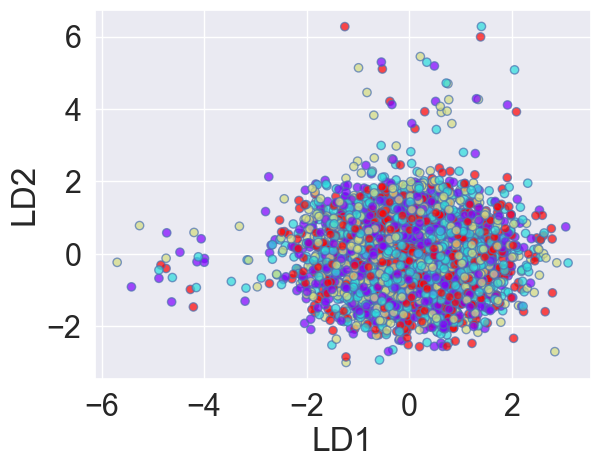

In [78]:
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap="rainbow",alpha=0.7,edgecolors="b")

In [88]:
from mpl_toolkits.mplot3d import Axes3D

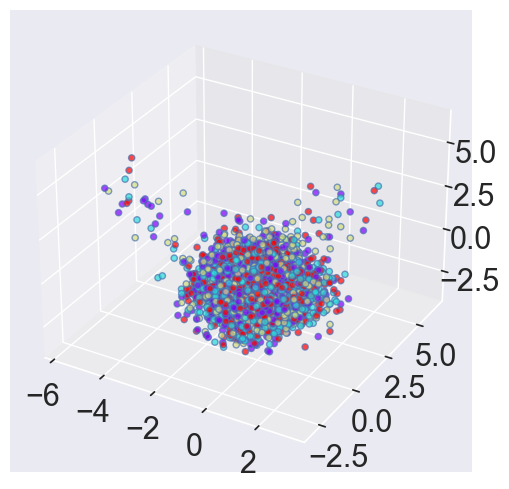

In [79]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_lda[:, 0], X_lda[:, 1], X_lda[:, 2], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')